
# 1.Problem Statement

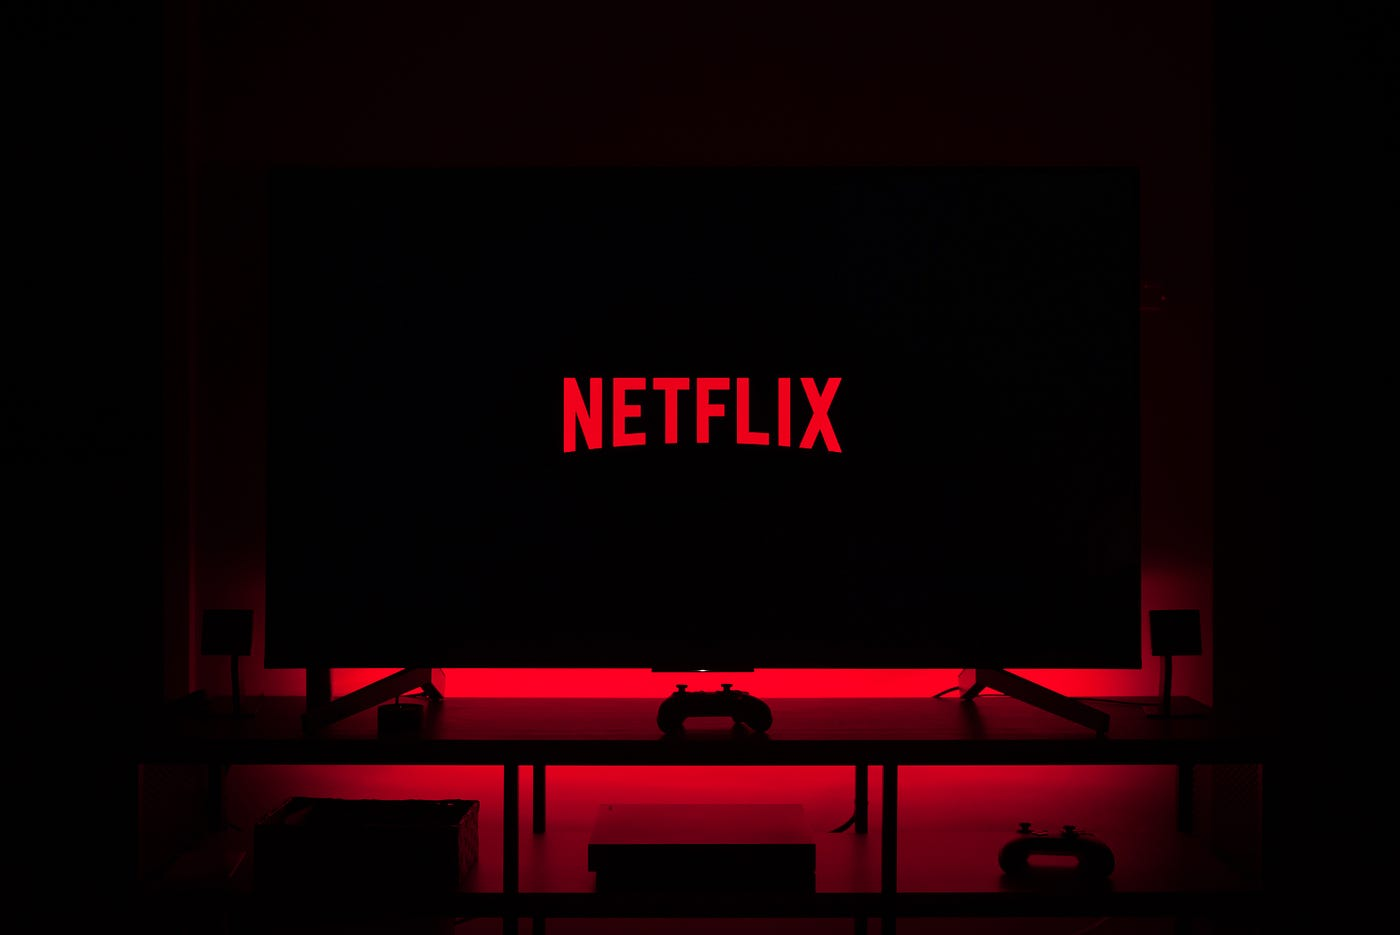

1. Problem Setting:
Due to Covid-19 lockdown, OTT space is bound to grow as access to entertainment has become
handier with the abundant amount of unlimited library at any time. Our module is to focus on
predicting the future shows or movies genre and age group prediction based on the history of
previous movies released on the OTT platform.


2. Problem Definition:
With the current trend in the entertainment industry moving more towards OTT platforms, there
is a heavy competition for the rising popularity in this business. As of 2022, Netflix leads this OTT
market having a valuation of about $129.141Billion with Prime and Hulu close behind. Also, with
most of the world population either in or moving towards work from home since Covid-19
pandemic, Netflix’s business and the introduction of new subscription plans added to its already
roaring popularity. The motive behind our project is to come up with a prediction system to know
about the details of the upcoming Netflix shows and movies beforehand. This model fulfils this
purpose by incorporating machine learning algorithms to predict the genre and the target
population of the future upcoming projects which are to be streamed.
3. Data Sources:
The data for the problem statement is obtained from the sources such as Netflix.com and kaggle.
* Netflix : 
www.netflix.com
https://www.whats-on-netflix.com/news/the-netflix-id-bible-every-category-on-netflix/
* Kaggle : 1.https://www.kaggle.com/datasets/shivamb/netflix-shows
4. Publication : M. Murugesan, R. Gowtham, R. Logesh, S. Selvaganapathy, R. Yogesh Muthumalai,
"Various Diseases’ Prediction Based on Symptom by Using Machine Learning", Computer
Networks and Inventive Communication Technologies, vol.141, pp.409, 2023.

# 2.Libraries & custom functions

In [655]:

import pandas as pd
import numpy as np
#from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import squarify

In [656]:
def missing_values_percentage(dataframe):
    result= (round((dataframe.isnull().sum() * 100/ len(dataframe)),2).sort_values(ascending=False))
    df_missing_values = pd.DataFrame(result,columns=['missing_percentage'])
    df_missing_values.reset_index(inplace=True)
    df_missing_values = df_missing_values.rename(columns = {'index':'column_name'})
    return df_missing_values

# 3.Data Import

In [657]:
url='https://drive.google.com/file/d/1IHDr6R9SBDV8VvCdFCDOfTCaEi2vAAzW/view?usp=share_link'
url1='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url1)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# 4.Data Preprocessing and Cleaning

In [658]:
# Convert 'listed_in' column to string and split the values by comma
df['listed_in'] = df['listed_in'].astype(str).str.split(',')

# Create a new DataFrame 'df_temp' by converting the 'listed_in' column into multiple columns
# Each value from the 'listed_in' column will be a new column in 'df_temp'
# The new column names will be 'genre_1', 'genre_2', 'genre_3', and so on
df_temp = pd.DataFrame(df['listed_in'].tolist(), columns=['genre_' + str(i) for i in range(1, df['listed_in'].apply(len).max()+1)])

# Concatenate the original DataFrame 'df' and the new DataFrame 'df_temp' along the columns axis
df = pd.concat([df, df_temp], axis=1)


In [659]:
# fin ding the percentage columns having missing values to drop the columns 
columns_tobe_deleted = missing_values_percentage(df)
columns_tobe_deleted 

,column_name,missing_percentage
0,genre_3,57.66
1,director,29.91
2,genre_2,22.94
3,country,9.44
4,cast,9.37
5,date_added,0.11
6,rating,0.05
7,duration,0.03
8,show_id,0.00
9,type,0.00


In [660]:
# dropping the columns having more than 20% empty values
df_missing_values = columns_tobe_deleted [columns_tobe_deleted ['missing_percentage'] > 20.0]
df_missing_values

,column_name,missing_percentage
0,genre_3,57.66
1,director,29.91
2,genre_2,22.94


In [661]:
#column_list = df_missing_values['column_name'].to_numpy()
column_list =['genre_3','genre_2']
for i in column_list:
  df = df.drop([i], axis=1)

In [662]:
df.shape

(8807, 13)

In [663]:
df = df.applymap(lambda x: x.upper() if type(x) == str else x)

In [664]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre_1
0,S1,MOVIE,DICK JOHNSON IS DEAD,KIRSTEN JOHNSON,NaN,UNITED STATES,"SEPTEMBER 25, 2021",2020,PG-13,90 MIN,[Documentaries],"AS HER FATHER NEARS THE END OF HIS LIFE, FILMM...",DOCUMENTARIES
1,S2,TV SHOW,BLOOD & WATER,NaN,"AMA QAMATA, KHOSI NGEMA, GAIL MABALANE, THABAN...",SOUTH AFRICA,"SEPTEMBER 24, 2021",2021,TV-MA,2 SEASONS,"[International TV Shows, TV Dramas, TV Myste...","AFTER CROSSING PATHS AT A PARTY, A CAPE TOWN T...",INTERNATIONAL TV SHOWS
2,S3,TV SHOW,GANGLANDS,JULIEN LECLERCQ,"SAMI BOUAJILA, TRACY GOTOAS, SAMUEL JOUY, NABI...",NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Crime TV Shows, International TV Shows, TV ...",TO PROTECT HIS FAMILY FROM A POWERFUL DRUG LOR...,CRIME TV SHOWS
3,S4,TV SHOW,JAILBIRDS NEW ORLEANS,NaN,NaN,NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Docuseries, Reality TV]","FEUDS, FLIRTATIONS AND TOILET TALK GO DOWN AMO...",DOCUSERIES
4,S5,TV SHOW,KOTA FACTORY,NaN,"MAYUR MORE, JITENDRA KUMAR, RANJAN RAJ, ALAM K...",INDIA,"SEPTEMBER 24, 2021",2021,TV-MA,2 SEASONS,"[International TV Shows, Romantic TV Shows, ...",IN A CITY OF COACHING CENTERS KNOWN TO TRAIN I...,INTERNATIONAL TV SHOWS


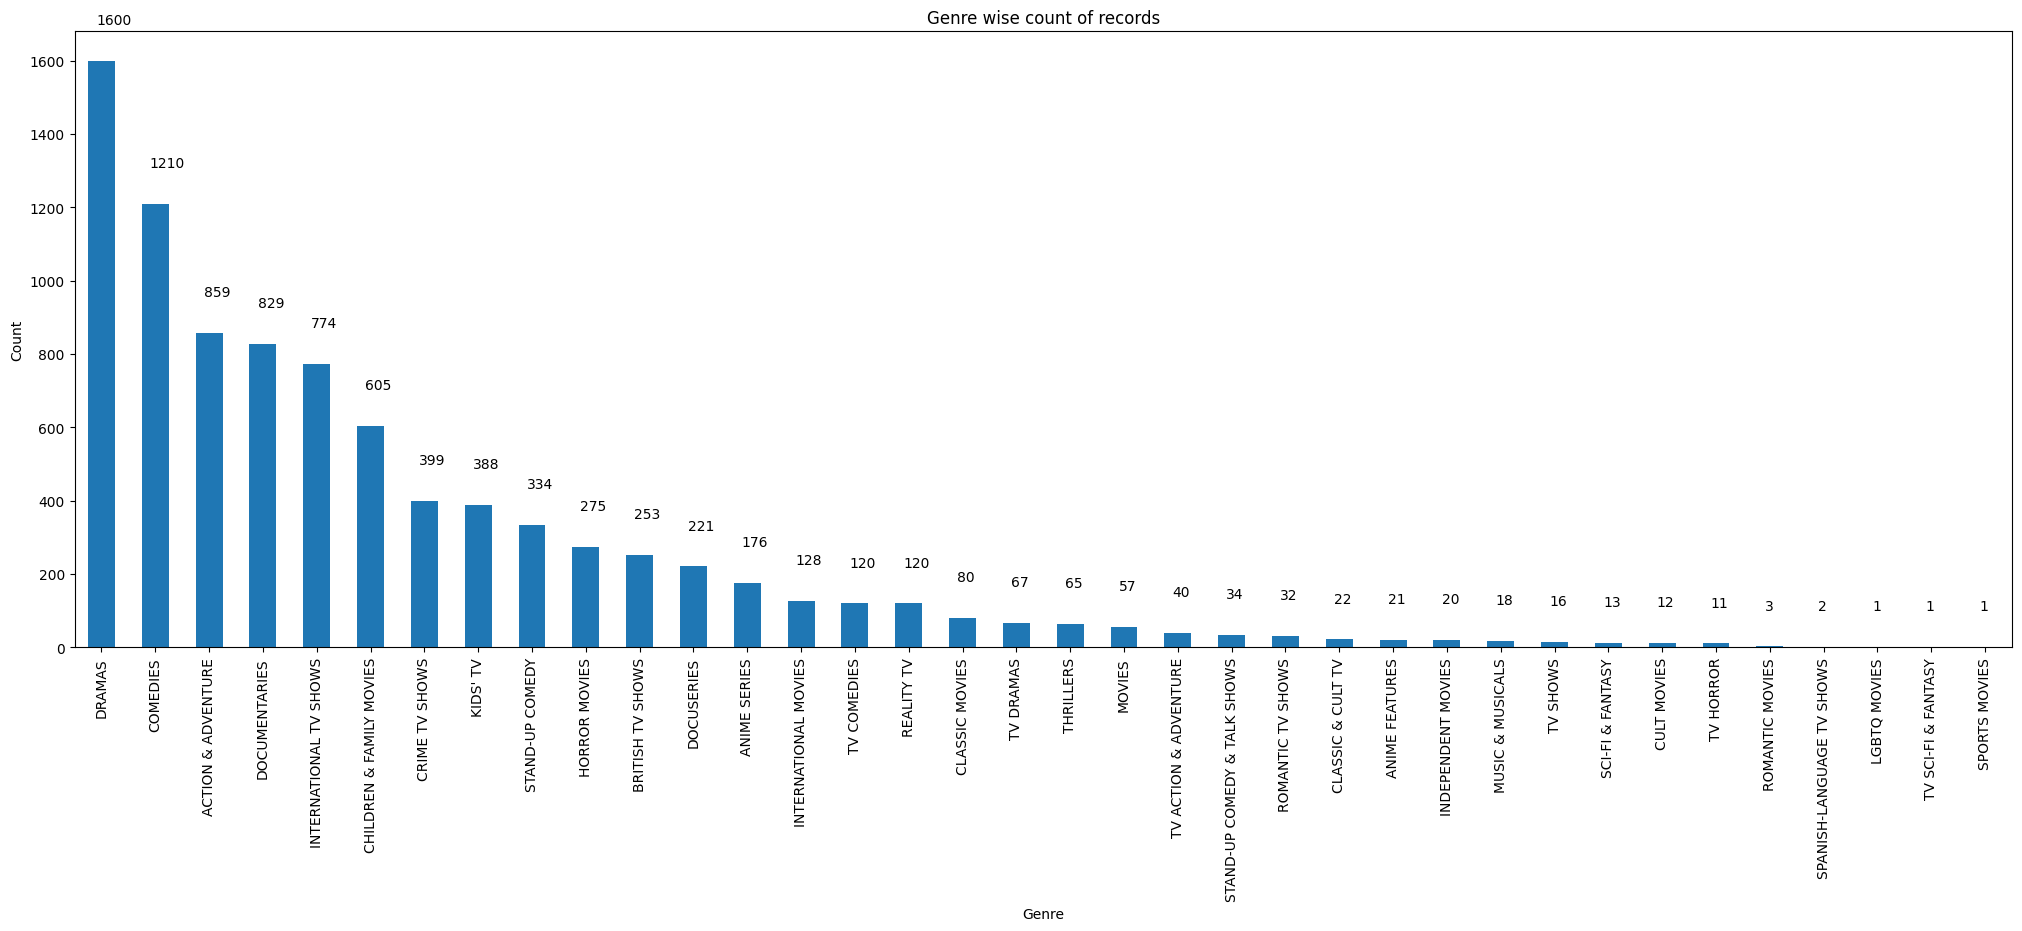

In [665]:
# Calculate the count of each unique value in the 'genre_1' column
value_counts = df['genre_1'].value_counts()

# Create a new figure for the plot and set its size
plt.figure(figsize=(25, 8))

# Create a bar plot using the value_counts series as the data source
value_counts.plot(kind='bar')

# Set the plot title, x-axis label, and y-axis label
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')

# Add labels to the top of each bar with the count of records for that genre
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))

# Display the plot
plt.show()


In [666]:
df['genre_1'].nunique()

36

In [667]:
# This lambda function takes a genre value as input and maps it to a new genre category.
get_new_genre = lambda val: 'HORROR & THRILLERS' if val in ['HORROR MOVIES', 'CRIME TV SHOWS', 'THRILLERS', 'ROMANTIC MOVIES', 'TV HORROR'] else \
                            'COMEDY' if val in ['COMEDIES','STAND-UP COMEDY','TV COMEDIES','STAND-UP COMEDY & TALK SHOWS'] else \
                            'DRAMAS' if val in ['DRAMAS', 'TV DRAMAS', 'ROMANTIC TV SHOWS', 'ROMANTIC MOVIES'] else \
                            'ACTION & ADVENTURE' if val in ['TV ACTION & ADVENTURE', 'ACTION & ADVENTURE', 'TV SCI-FI & FANTASY', 'SCI-FI & FANTASY', 'SPORTS MOVIES', 'CLASSIC MOVIES', 'CULT MOVIES', 'CLASSIC & CULT TV', 'REALITY TV', 'LGBTQ MOVIES'] else \
                            'ANIME' if val in ['ANIME SERIES', 'ANIME FEATURES', "KIDS' TV", 'MOVIES', 'INDEPENDENT MOVIES', 'TV SHOWS'] else \
                            'DOCUMENTARIES' if val in ['DOCUMENTARIES','DOCUSERIES','SPANISH-LANGUAGE TV SHOWS','BRITISH TV SHOWS'] else \
                            'CHILDREN & FAMILY' if val in ['CHILDREN & FAMILY MOVIES','INTERNATIONAL TV SHOWS','MUSIC & MUSICALS','INTERNATIONAL MOVIES'] else \
                            'OTHER'

In [668]:
df['genre'] = df['genre_1'].apply(get_new_genre)

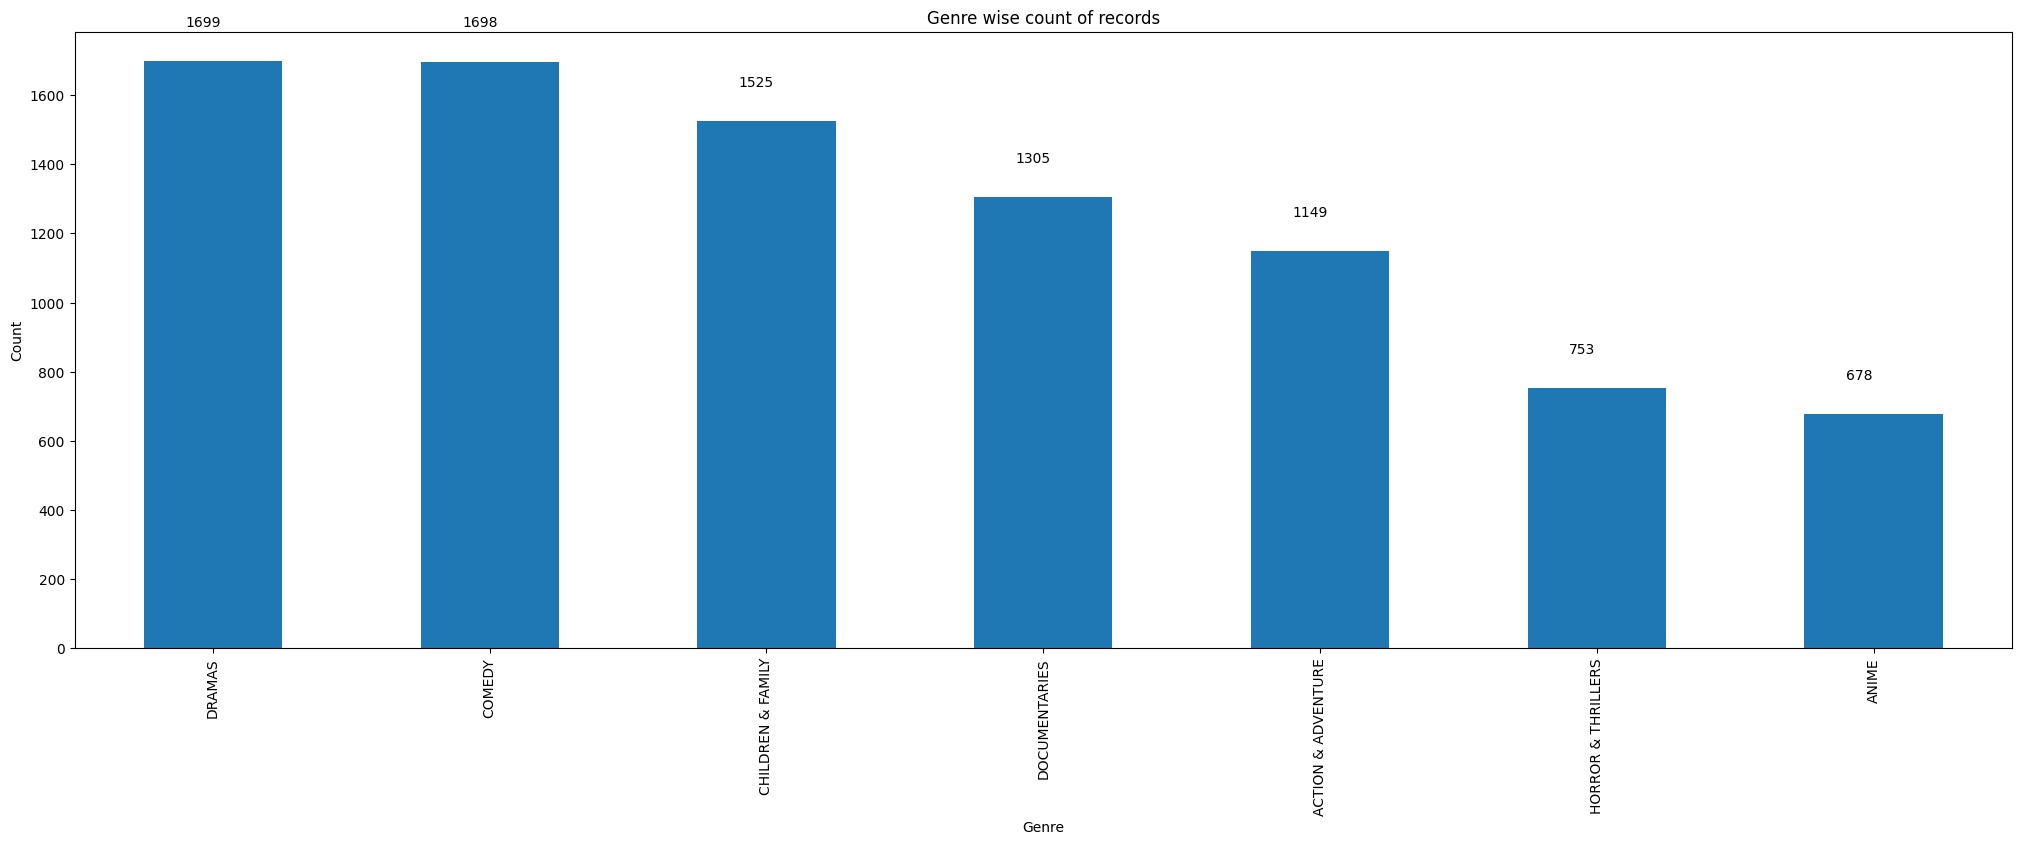

In [669]:
value_counts = df['genre'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()

In [670]:
df.rename({'genre_1': 'Category'}, axis=1, inplace=True)

In [671]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Category,genre
0,S1,MOVIE,DICK JOHNSON IS DEAD,KIRSTEN JOHNSON,NaN,UNITED STATES,"SEPTEMBER 25, 2021",2020,PG-13,90 MIN,[Documentaries],"AS HER FATHER NEARS THE END OF HIS LIFE, FILMM...",DOCUMENTARIES,DOCUMENTARIES
1,S2,TV SHOW,BLOOD & WATER,NaN,"AMA QAMATA, KHOSI NGEMA, GAIL MABALANE, THABAN...",SOUTH AFRICA,"SEPTEMBER 24, 2021",2021,TV-MA,2 SEASONS,"[International TV Shows, TV Dramas, TV Myste...","AFTER CROSSING PATHS AT A PARTY, A CAPE TOWN T...",INTERNATIONAL TV SHOWS,CHILDREN & FAMILY
2,S3,TV SHOW,GANGLANDS,JULIEN LECLERCQ,"SAMI BOUAJILA, TRACY GOTOAS, SAMUEL JOUY, NABI...",NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Crime TV Shows, International TV Shows, TV ...",TO PROTECT HIS FAMILY FROM A POWERFUL DRUG LOR...,CRIME TV SHOWS,HORROR & THRILLERS
3,S4,TV SHOW,JAILBIRDS NEW ORLEANS,NaN,NaN,NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Docuseries, Reality TV]","FEUDS, FLIRTATIONS AND TOILET TALK GO DOWN AMO...",DOCUSERIES,DOCUMENTARIES
4,S5,TV SHOW,KOTA FACTORY,NaN,"MAYUR MORE, JITENDRA KUMAR, RANJAN RAJ, ALAM K...",INDIA,"SEPTEMBER 24, 2021",2021,TV-MA,2 SEASONS,"[International TV Shows, Romantic TV Shows, ...",IN A CITY OF COACHING CENTERS KNOWN TO TRAIN I...,INTERNATIONAL TV SHOWS,CHILDREN & FAMILY


In [672]:
# This lambda function takes a genre value as input and maps it to a new column known as Age.
get_age = lambda val: '18+' if val in ['HORROR & THRILLERS'] else \
                            '7+' if val in ['COMEDY'] else \
                            '16+' if val in ['DRAMAS'] else \
                            '16+' if val in ['ACTION & ADVENTURE'] else \
                            '7+' if val in ['ANIME'] else \
                            '13+' if val in ['DOCUMENTARIES'] else \
                            '7+' if val in ['CHILDREN & FAMILY'] else \
                            'OTHER'

In [673]:
df['age'] = df['genre'].apply(get_age)

In [674]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Category,genre,age
0,S1,MOVIE,DICK JOHNSON IS DEAD,KIRSTEN JOHNSON,NaN,UNITED STATES,"SEPTEMBER 25, 2021",2020,PG-13,90 MIN,[Documentaries],"AS HER FATHER NEARS THE END OF HIS LIFE, FILMM...",DOCUMENTARIES,DOCUMENTARIES,13+
1,S2,TV SHOW,BLOOD & WATER,NaN,"AMA QAMATA, KHOSI NGEMA, GAIL MABALANE, THABAN...",SOUTH AFRICA,"SEPTEMBER 24, 2021",2021,TV-MA,2 SEASONS,"[International TV Shows, TV Dramas, TV Myste...","AFTER CROSSING PATHS AT A PARTY, A CAPE TOWN T...",INTERNATIONAL TV SHOWS,CHILDREN & FAMILY,7+
2,S3,TV SHOW,GANGLANDS,JULIEN LECLERCQ,"SAMI BOUAJILA, TRACY GOTOAS, SAMUEL JOUY, NABI...",NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Crime TV Shows, International TV Shows, TV ...",TO PROTECT HIS FAMILY FROM A POWERFUL DRUG LOR...,CRIME TV SHOWS,HORROR & THRILLERS,18+
3,S4,TV SHOW,JAILBIRDS NEW ORLEANS,NaN,NaN,NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Docuseries, Reality TV]","FEUDS, FLIRTATIONS AND TOILET TALK GO DOWN AMO...",DOCUSERIES,DOCUMENTARIES,13+
4,S5,TV SHOW,KOTA FACTORY,NaN,"MAYUR MORE, JITENDRA KUMAR, RANJAN RAJ, ALAM K...",INDIA,"SEPTEMBER 24, 2021",2021,TV-MA,2 SEASONS,"[International TV Shows, Romantic TV Shows, ...",IN A CITY OF COACHING CENTERS KNOWN TO TRAIN I...,INTERNATIONAL TV SHOWS,CHILDREN & FAMILY,7+


In [675]:
df['duration'].unique()

array(['90 MIN', '2 SEASONS', '1 SEASON', '91 MIN', '125 MIN',
       '9 SEASONS', '104 MIN', '127 MIN', '4 SEASONS', '67 MIN', '94 MIN',
       '5 SEASONS', '161 MIN', '61 MIN', '166 MIN', '147 MIN', '103 MIN',
       '97 MIN', '106 MIN', '111 MIN', '3 SEASONS', '110 MIN', '105 MIN',
       '96 MIN', '124 MIN', '116 MIN', '98 MIN', '23 MIN', '115 MIN',
       '122 MIN', '99 MIN', '88 MIN', '100 MIN', '6 SEASONS', '102 MIN',
       '93 MIN', '95 MIN', '85 MIN', '83 MIN', '113 MIN', '13 MIN',
       '182 MIN', '48 MIN', '145 MIN', '87 MIN', '92 MIN', '80 MIN',
       '117 MIN', '128 MIN', '119 MIN', '143 MIN', '114 MIN', '118 MIN',
       '108 MIN', '63 MIN', '121 MIN', '142 MIN', '154 MIN', '120 MIN',
       '82 MIN', '109 MIN', '101 MIN', '86 MIN', '229 MIN', '76 MIN',
       '89 MIN', '156 MIN', '112 MIN', '107 MIN', '129 MIN', '135 MIN',
       '136 MIN', '165 MIN', '150 MIN', '133 MIN', '70 MIN', '84 MIN',
       '140 MIN', '78 MIN', '7 SEASONS', '64 MIN', '59 MIN', '139 MIN',
    

In [676]:
# This lambda function takes a duration value as input and converts it into minute values.
get_duration = lambda val: '400 MIN' if val in ['1 SEASON'] else \
                            '800 MIN' if val in ['2 SEASONS'] else \
                            '1200 MIN' if val in ['3 SEASONS'] else \
                            '1600 MIN' if val in ['4 SEASONS'] else \
                            '2000 MIN' if val in ['5 SEASONS'] else \
                            '2400 MIN' if val in ['6 SEASONS'] else \
                            '2800 MIN' if val in ['7 SEASONS'] else \
                            '3200 MIN' if val in ['8 SEASONS'] else \
                            '3600 MIN' if val in ['10 SEASONS'] else \
                            '4000 MIN' if val in ['11 SEASONS'] else \
                            '4400 MIN' if val in ['12 SEASONS'] else \
                            '4800 MIN' if val in ['13 SEASONS'] else \
                            '5200 MIN' if val in ['14 SEASONS'] else \
                            '5600 MIN' if val in ['15 SEASONS'] else \
                            '6000 MIN' if val in ['16 SEASONS'] else \
                            '6400 MIN' if val in ['17 SEASONS'] else  val

In [677]:
df['duration_main'] = df['duration'].apply(get_duration)

In [678]:
df[['duration_val', 'duration_unit']] = df['duration_main'].str.split(' ', expand=True)
df['duration_in_mins'] = pd.to_numeric(df['duration_val'])


In [679]:
df['date_added'] = df['date_added'].str.strip()

In [680]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [681]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

In [682]:
missing_values_percentage(df)

,column_name,missing_percentage
0,director,29.91
1,country,9.44
2,cast,9.37
3,year,0.11
4,month,0.11
5,date_added,0.11
6,day,0.11
7,rating,0.05
8,duration,0.03
9,duration_in_mins,0.03


In [683]:
df=df.dropna().reset_index(drop=True)

In [684]:
df = df.astype({"day":"int","month":"int","year":"int"})

In [685]:
df = df.drop(['date_added'], axis=1)

In [686]:
df = df.reset_index(drop=True)

In [687]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,Category,genre,age,duration_main,duration_val,duration_unit,duration_in_mins,day,month,year
0,S8,MOVIE,SANKOFA,HAILE GERIMA,"KOFI GHANABA, OYAFUNMIKE OGUNLANO, ALEXANDRA D...","UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...",1993,TV-MA,125 MIN,"[Dramas, Independent Movies, International M...",...,DRAMAS,DRAMAS,16+,125 MIN,125,MIN,125.0,24,9,2021
1,S9,TV SHOW,THE GREAT BRITISH BAKING SHOW,ANDY DEVONSHIRE,"MEL GIEDROYC, SUE PERKINS, MARY BERRY, PAUL HO...",UNITED KINGDOM,2021,TV-14,9 SEASONS,"[British TV Shows, Reality TV]",...,BRITISH TV SHOWS,DOCUMENTARIES,13+,9 SEASONS,9,SEASONS,9.0,24,9,2021
2,S10,MOVIE,THE STARLING,THEODORE MELFI,"MELISSA MCCARTHY, CHRIS O'DOWD, KEVIN KLINE, T...",UNITED STATES,2021,PG-13,104 MIN,"[Comedies, Dramas]",...,COMEDIES,COMEDY,7+,104 MIN,104,MIN,104.0,24,9,2021
3,S13,MOVIE,JE SUIS KARL,CHRISTIAN SCHWOCHOW,"LUNA WEDLER, JANNIS NIEWÖHNER, MILAN PESCHEL, ...","GERMANY, CZECH REPUBLIC",2021,TV-MA,127 MIN,"[Dramas, International Movies]",...,DRAMAS,DRAMAS,16+,127 MIN,127,MIN,127.0,23,9,2021
4,S25,MOVIE,JEANS,S. SHANKAR,"PRASHANTH, AISHWARYA RAI BACHCHAN, SRI LAKSHMI...",INDIA,1998,TV-14,166 MIN,"[Comedies, International Movies, Romantic Mo...",...,COMEDIES,COMEDY,7+,166 MIN,166,MIN,166.0,21,9,2021


In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           5332 non-null   object 
 1   type              5332 non-null   object 
 2   title             5332 non-null   object 
 3   director          5332 non-null   object 
 4   cast              5332 non-null   object 
 5   country           5332 non-null   object 
 6   release_year      5332 non-null   int64  
 7   rating            5332 non-null   object 
 8   duration          5332 non-null   object 
 9   listed_in         5332 non-null   object 
 10  description       5332 non-null   object 
 11  Category          5332 non-null   object 
 12  genre             5332 non-null   object 
 13  age               5332 non-null   object 
 14  duration_main     5332 non-null   object 
 15  duration_val      5332 non-null   object 
 16  duration_unit     5332 non-null   object 


In [689]:
df = df[['title','director','Category','country','genre','rating','day','month','year','type','duration_in_mins','duration_unit','age']]

# 5.Data Exploration

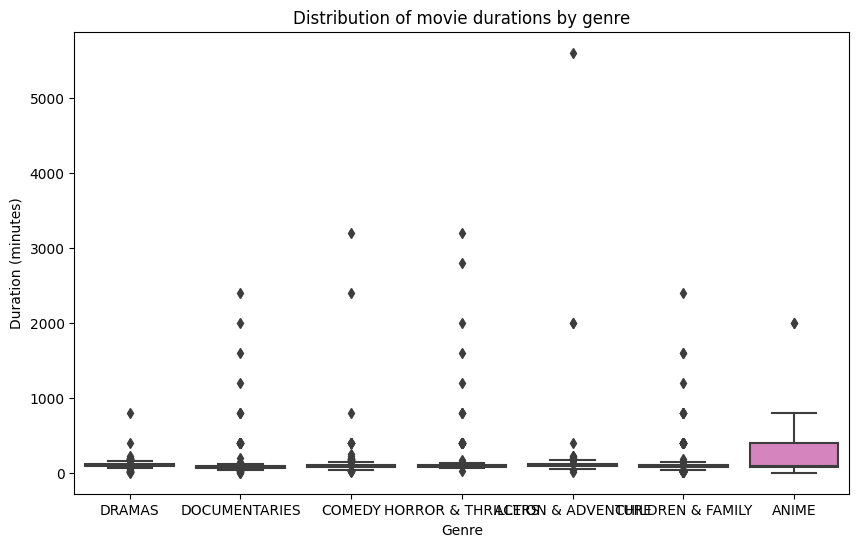

In [690]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='duration_in_mins', data=df)
# sns.violinplot(x='genre', y='duration', data=data)

# Customize the plot
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.title('Distribution of movie/Tv shows durations by genre')
plt.show()

In [691]:
counts = df['rating'].value_counts()

# Filter the dataframe to remove rows with counts greater than 1
df = df[df['rating'].isin(counts[counts > 1].index)]

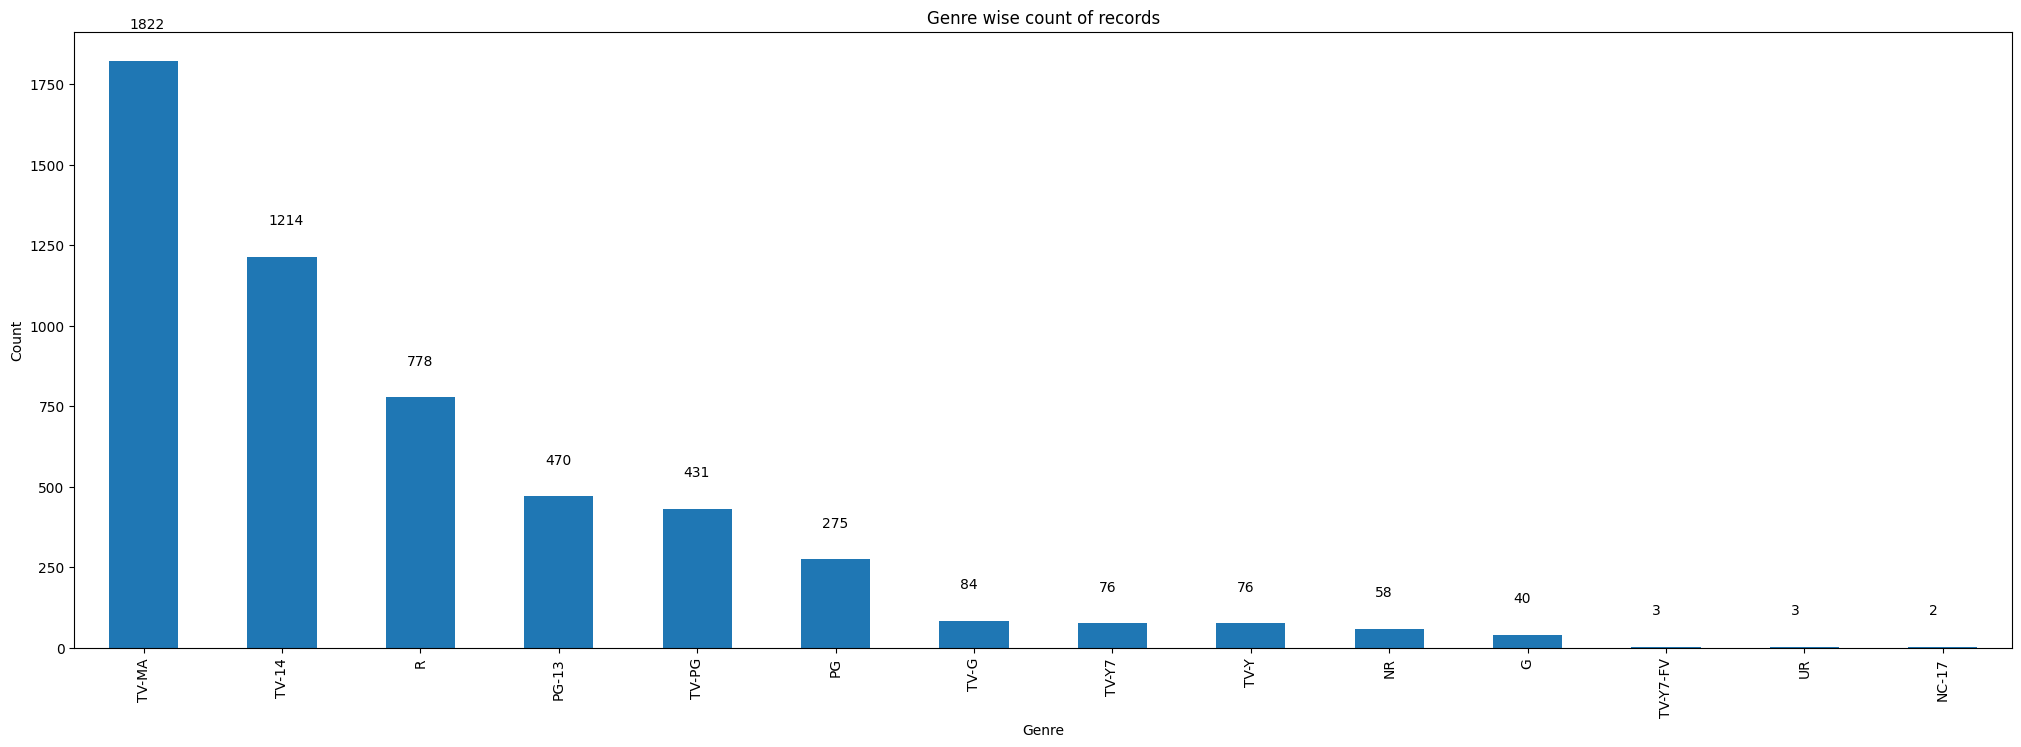

In [692]:
value_counts = df['rating'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()

In [693]:
import plotly.express as px
counts = df.groupby(['genre', 'Category']).size().reset_index(name='count')

# create a treemap using Plotly
fig = px.treemap(counts, path=['genre', 'Category'], values='count')

# add title
fig.update_layout(title='Genre and Category Treemap')

# show the plot
fig.show()




In [694]:
le = LabelEncoder()
columns = [
 'title','Category','country','genre','rating','day','month','year','type','duration_in_mins','age','director']
for col in columns:
    df[col] = le.fit_transform(df[col])

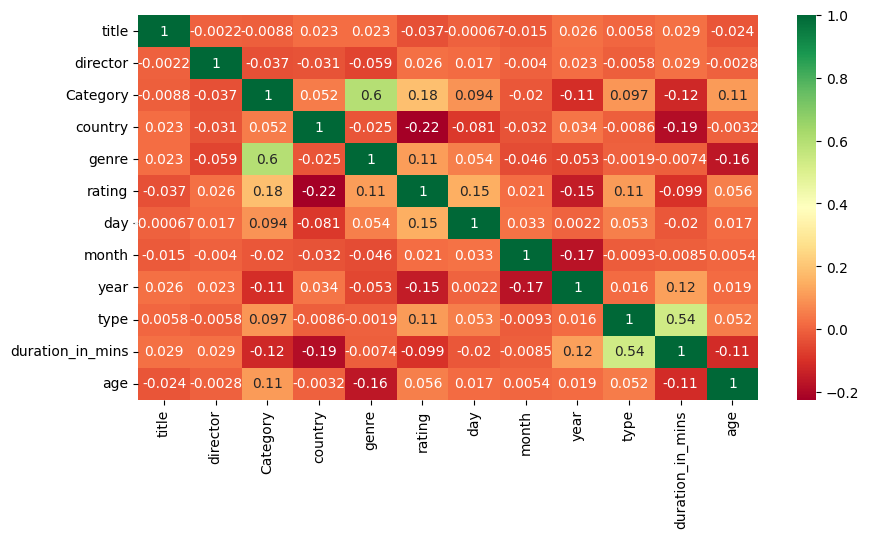

In [695]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 6.Exploration of Data Models

In [696]:
X = df[['title','Category','country','rating','day','month','year','duration_in_mins','age','director']]

In [697]:
Y = df['genre']

In [698]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [699]:
RandomForest =  RandomForestClassifier()
DecisionTeree  = DecisionTreeClassifier()
Logisticreg = LogisticRegression()
SVM =  SVC()
KNN = KNeighborsClassifier()

In [700]:
models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'R2 Score', 'Precision', 'Recall'])

for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    result = {'Model': type(model).__name__, 'Accuracy': accuracy, 'R2 Score': r2_score, 'Precision': precision, 'Recall': recall}
    results_df = results_df.append(result, ignore_index=True)


RandomForestClassifier()


<ipython-input-700-def8a6a15c67>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-700-def8a6a15c67>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



DecisionTreeClassifier()
LogisticRegression()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-700-def8a6a15c67>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



SVC()
KNeighborsClassifier()


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-700-def8a6a15c67>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-700-def8a6a15c67>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [701]:
results_df

,Model,Accuracy,R2 Score,Precision,Recall
0,RandomForestClassifier,0.995314,0.983870,0.995338,0.995314
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
2,LogisticRegression,0.358950,-0.403560,0.209655,0.358950
3,SVC,0.331771,-0.601723,0.190712,0.331771
4,KNeighborsClassifier,0.277413,-0.886007,0.271387,0.277413


In [702]:
results_df1 = pd.DataFrame(columns=['Model', 'MAE', 'RMSE'])

for model in models:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    MAE = mean(absolute(scores))
    RMSE = sqrt(mean(absolute(scores)))
    result = {'Model': type(model).__name__, 'MAE': MAE, 'RMSE': RMSE}
    results_df1 = results_df1.append(result, ignore_index=True)


<ipython-input-702-d7e36df92801>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-702-d7e36df92801>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-702-d7e36df92801>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-702-d7e36df92801>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-702-d7e36df92801>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [703]:
results_df1 

,Model,MAE,RMSE
0,RandomForestClassifier,0.011020,0.104976
1,DecisionTreeClassifier,0.004924,0.070170
2,LogisticRegression,1.649004,1.284135
3,SVC,1.770926,1.330761
4,KNeighborsClassifier,1.992966,1.411724


In [704]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier()  
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
#view MAE
mean(absolute(scores))

0.009188678317206682

In [705]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_plot(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
    fig, ax = plt.subplots()
    result = sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_ylabel('Predicted Labels')
    ax.set_xlabel('True Labels')
    ax.set_title('Confusion Matrix')
    return result


<Axes: title={'center': 'Confusion Matrix'}, xlabel='True Labels', ylabel='Predicted Labels'>

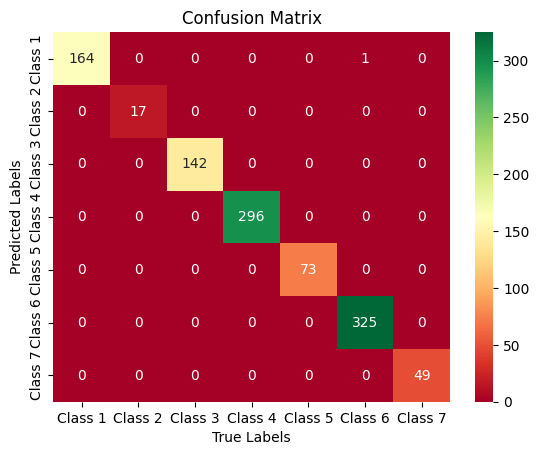

In [706]:
rf_model = RandomForestClassifier()
confusion_matrix_plot(rf_model)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='True Labels', ylabel='Predicted Labels'>

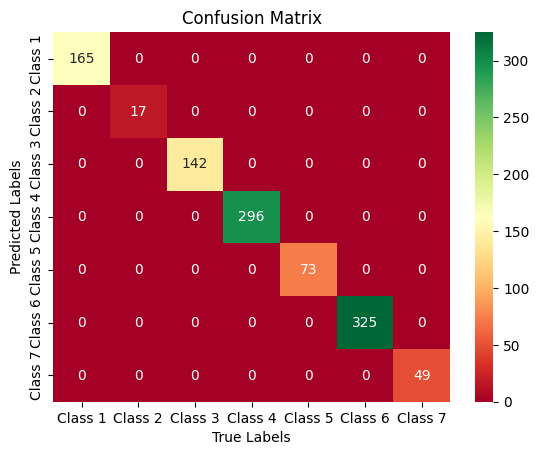

In [707]:
model = DecisionTreeClassifier()
confusion_matrix_plot(model)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Axes: title={'center': 'Confusion Matrix'}, xlabel='True Labels', ylabel='Predicted Labels'>

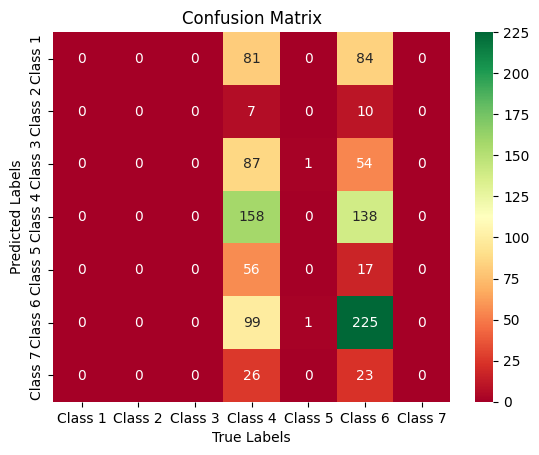

In [708]:
model = LogisticRegression()
confusion_matrix_plot(model)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='True Labels', ylabel='Predicted Labels'>

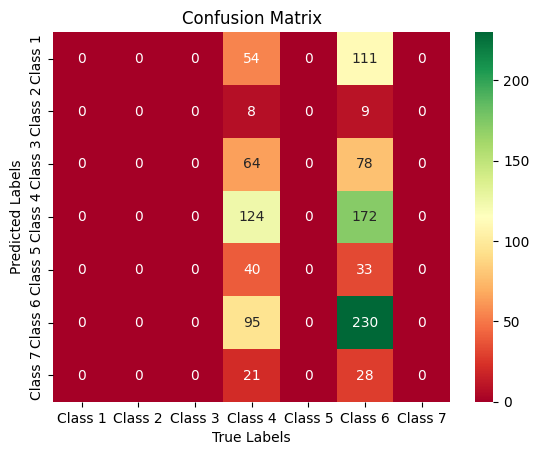

In [709]:
model = SVC()
confusion_matrix_plot(model)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='True Labels', ylabel='Predicted Labels'>

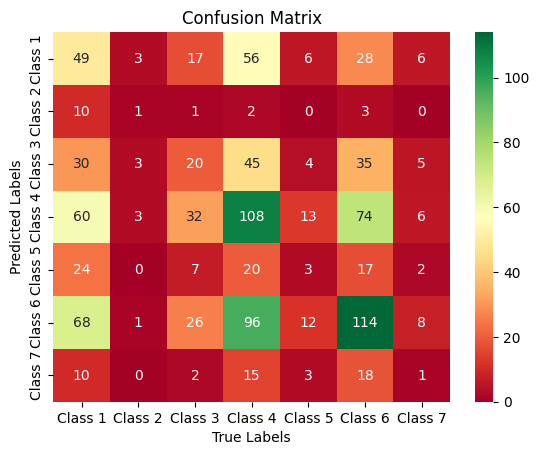

In [710]:
model = KNeighborsClassifier()
confusion_matrix_plot(model)

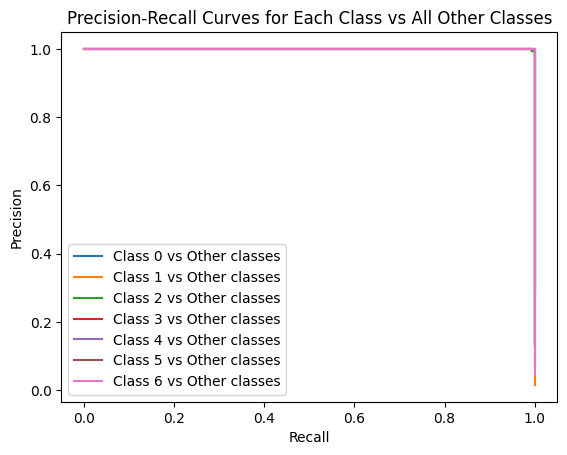

In [711]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
# Compute precision, recall, and threshold values for each class against all other classes
for i in range(len(classes)):
    class_of_interest = i
    y_pred_proba = clf.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test == class_of_interest, y_pred_proba[:, class_of_interest])
    plt.plot(recall, precision, label=f'Class {class_of_interest} vs Other classes')

# Set plot title and axis labels
plt.title('Precision-Recall Curves for Each Class vs All Other Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show plot legend
plt.legend()

# Show the plot
plt.show()


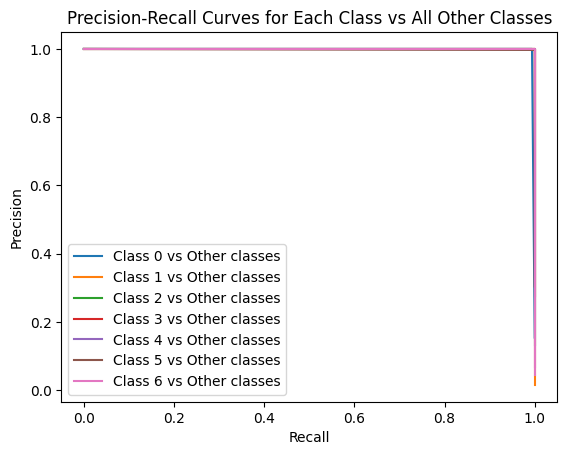

In [712]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
# Compute precision, recall, and threshold values for each class against all other classes
for i in range(len(classes)):
    class_of_interest = i
    y_pred_proba = clf.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test == class_of_interest, y_pred_proba[:, class_of_interest])
    plt.plot(recall, precision, label=f'Class {class_of_interest} vs Other classes')

# Set plot title and axis labels
plt.title('Precision-Recall Curves for Each Class vs All Other Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show plot legend
plt.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



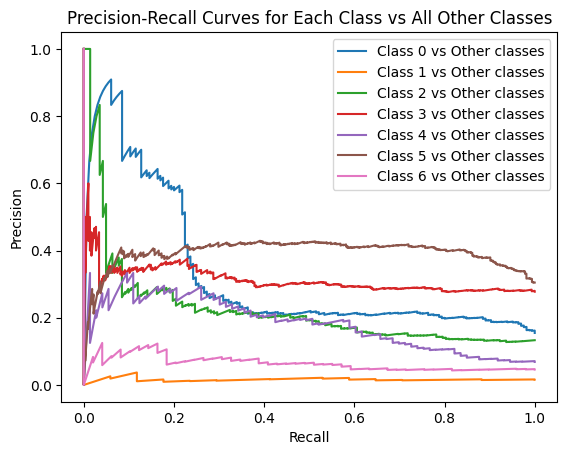

In [713]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
# Compute precision, recall, and threshold values for each class against all other classes
for i in range(len(classes)):
    class_of_interest = i
    y_pred_proba = clf.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test == class_of_interest, y_pred_proba[:, class_of_interest])
    plt.plot(recall, precision, label=f'Class {class_of_interest} vs Other classes')

# Set plot title and axis labels
plt.title('Precision-Recall Curves for Each Class vs All Other Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show plot legend
plt.legend()

# Show the plot
plt.show()


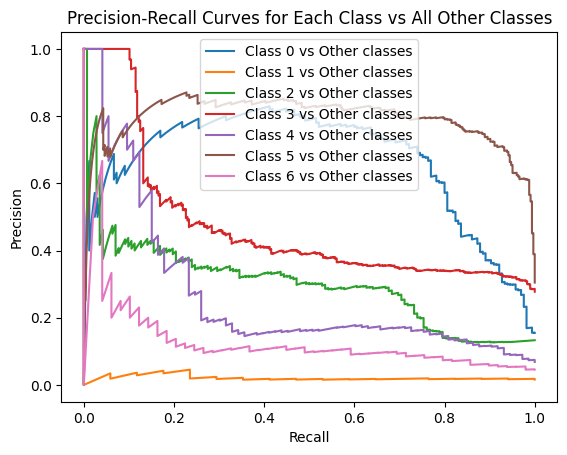

In [714]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
# Compute precision, recall, and threshold values for each class against all other classes
for i in range(len(classes)):
    class_of_interest = i
    y_pred_proba = clf.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test == class_of_interest, y_pred_proba[:, class_of_interest])
    plt.plot(recall, precision, label=f'Class {class_of_interest} vs Other classes')

# Set plot title and axis labels
plt.title('Precision-Recall Curves for Each Class vs All Other Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show plot legend
plt.legend()

# Show the plot
plt.show()


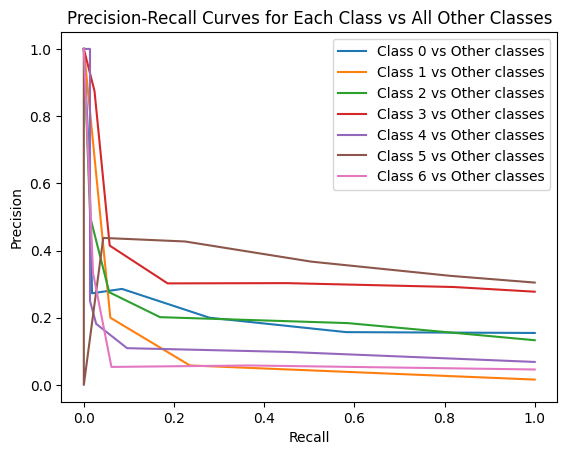

In [715]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
# Compute precision, recall, and threshold values for each class against all other classes
for i in range(len(classes)):
    class_of_interest = i
    y_pred_proba = clf.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test == class_of_interest, y_pred_proba[:, class_of_interest])
    plt.plot(recall, precision, label=f'Class {class_of_interest} vs Other classes')

# Set plot title and axis labels
plt.title('Precision-Recall Curves for Each Class vs All Other Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show plot legend
plt.legend()

# Show the plot
plt.show()


# 7.Final Model

Based on the above analysis Random forest and decision tree classifiers have better performance compared to the rest of the models.

In [716]:
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("r2_score OF THE MODEL: ", metrics.r2_score(y_test,y_pred))


ACCURACY OF THE MODEL:  0.9981255857544518
r2_score OF THE MODEL:  0.9985598604076877


In [717]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("r2_score OF THE MODEL: ", metrics.r2_score(y_test,y_pred))

Accuracy: 1.0
r2_score OF THE MODEL:  1.0
